<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_Exp_3_Linear_Regression_Placement_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

IMPORTING DATASET

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/placement.csv')
#reducing size of dataset by indexing
# data=data[:50]
print(data)

     cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]


DATA PREPROCESSING

In [ ]:
#dropping duplicate values
data.drop_duplicates(inplace=True)
#dropping columns with missing values
data.dropna(inplace=True)

In [ ]:
#performing normalization
scaler=MinMaxScaler()
scaler.fit_transform(data)

array([[0.4943609 , 0.58153846],
       [0.16165414, 0.18769231],
       [0.66917293, 0.57846154],
       [0.59398496, 0.70769231],
       [0.5037594 , 0.67692308],
       [0.68233083, 0.49846154],
       [0.46428571, 0.37846154],
       [0.46804511, 0.34153846],
       [0.34398496, 0.28923077],
       [0.7612782 , 0.65846154],
       [0.19924812, 0.15076923],
       [0.44172932, 0.37846154],
       [0.87969925, 0.70153846],
       [0.5018797 , 0.46769231],
       [0.65225564, 0.63076923],
       [0.56203008, 0.57230769],
       [0.48496241, 0.30153846],
       [0.21052632, 0.22153846],
       [0.5037594 , 0.49538462],
       [0.60526316, 0.44923077],
       [0.56766917, 0.55076923],
       [0.48684211, 0.48      ],
       [0.35338346, 0.28615385],
       [0.36278195, 0.34153846],
       [0.42669173, 0.41230769],
       [0.56766917, 0.70153846],
       [0.7612782 , 0.63076923],
       [0.21804511, 0.24307692],
       [0.31578947, 0.26769231],
       [0.54323308, 0.65230769],
       [0.

>VISUALIZING PRE-PROCESSED DATA

<Axes: xlabel='cgpa', ylabel='package'>

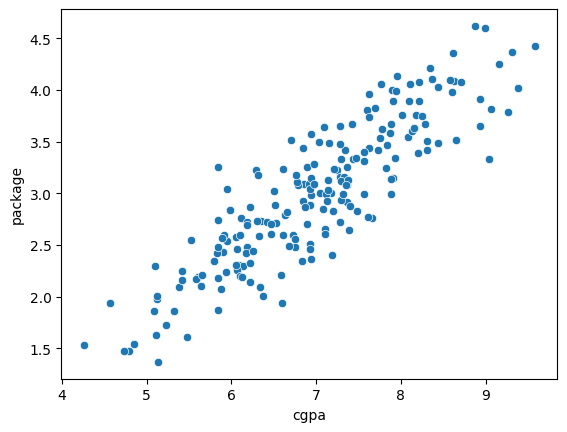

In [ ]:
#using scatterplot to visualize preprocessed data
sns.scatterplot(x=data['cgpa'],y=data['package'])

**LINEAR REGRESSION**

>INITIALIZING VALUES

In [ ]:
#dependent variable
Y=data['package']
#independent variable
X=data['cgpa']
#slope
slope=1
#intercept
incpt=1
#learning rate
lr=0.000001
#total number of iterations to be performed
iterations=500
#initializing a list to store calculated error values
error=[]

> APPLYING GRADIENT DESCEND ALGORITHM

In [ ]:
#for loop for 500 iterations
for itr in range(iterations):
  #initializing values for intermediate error,slope and intercept cost
  error_cost=0
  slope_cost=0
  incpt_cost=0
  #loop for calculating cost function
  for i in range(len(X)):
    y_predicted=slope*X[i]+incpt
    #cost function
    error_cost+=(Y[i]-y_predicted)**2
    #loop for implementing gradient descent function for the calculated error
    for j in range(len(X)):
       #partial derivative w.r.t Y
       partial_deri_intcpt=-2*(Y[j]-((slope*X[j])+incpt))
       #partial derivative w.r.t X
       partial_deri_slope=(-2*X[j])*(Y[j]-((slope*X[j])+incpt))
       #accumulating values of partial derivative in each iteration
       incpt_cost+=partial_deri_intcpt
       slope_cost+=partial_deri_slope
    #updating values of slope and intercept
    incpt=incpt-(lr*incpt_cost)
    slope=slope-(lr*slope_cost)
  #printing error,slope and intercept
  print(itr,incpt,slope)
  #appending corresponding error to error list
  error.append(error_cost)
#printing error
print(error)



0 0.48362468618352594 -0.29458192499089264
1 0.38641485044478524 0.9903801186967
2 -0.00011764303160371288 -0.1381551559428648
3 -0.03446870363535052 0.9666712322249779
4 -0.32781503947440416 -0.015516456207350572
5 -0.3236002019364466 0.9356642210940469
6 -0.5493853007225485 0.0819279910569679
7 -0.5225927994298348 0.9016792264203358
8 -0.6988334902288287 0.16032916775454112
9 -0.6598657288534526 0.8673932400924634
10 -0.7993171233249518 0.2241329163779219
11 -0.7548344537244941 0.8343988912906298
12 -0.8666000549955444 0.27658833489296925
13 -0.8207691753299695 0.8035806624997738
14 -0.9114075083583864 0.3200990718323308
15 -0.8667450209934737 0.7753672461035788
16 -0.9410317307209951 0.35646686053473936
17 -0.898972649217349 0.7498999955487164
18 -0.9604266272081954 0.3870610260098086
19 -0.921706209650939 0.7271446440922188
20 -0.9729539245023995 0.4129370433261078
21 -0.9378629853643019 0.7069647574648086
22 -0.9808917222273914 0.4349199500011165
23 -0.9494463412483517 0.689169457

In [ ]:
final_error=Y-y_predicted
se=np.sum(final_error**2)
mse=se/len(X)
print(f"Mean squared error is: {mse}")
print(f"Slope : {slope}")
print(f" Intercept : {incpt}")


Mean squared error is: 0.6685868557125656
Slope : 0.5695912947937599
 Intercept : -0.9856779462557334


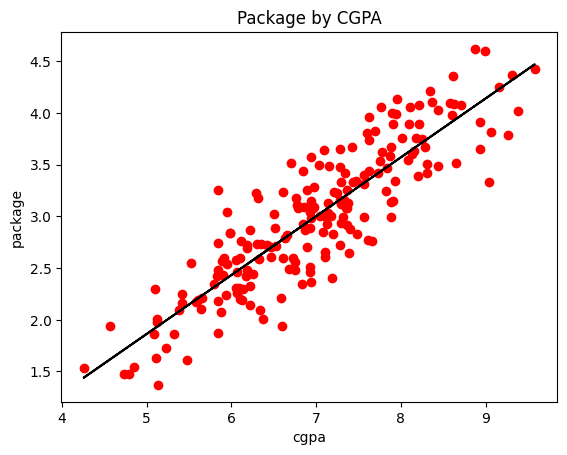

In [ ]:
regression_fit=(slope*X)+incpt
plt.scatter(X,Y,color='red')
plt.plot(X,regression_fit,color='black')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.title('Package by CGPA')
plt.show()